# Capstone Project : Credit Scoring System

<p>This project created for checking defaults on the credit basis on the past credit data of an individuals.</p>

In [8]:
# import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
import joblib

In [9]:
# load data into dataframe
df = pd.read_csv('credit_risk_dataset.csv')
df.head(5)                                       # showing first five rows of dataframe

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Data Preprocessing

### 1. Data information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### 2. Checking for missing value

In [11]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### 3. Handling missing value

In [12]:
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace = True)

C:\Users\yapat\AppData\Local\Temp\ipykernel_6648\921135982.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace = True)


In [13]:
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace = True)

C:\Users\yapat\AppData\Local\Temp\ipykernel_6648\3436135235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace = True)


In [14]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### 4. Find Duplicated rows and remove it

In [15]:
duplicates = df[df.duplicated(keep=False)]  # keep=False to show all duplicates
print("Duplicated Rows:\n", duplicates)

Duplicated Rows:
        person_age  person_income person_home_ownership  person_emp_length  \
14             23         115000                  RENT                2.0   
238            22         183000              MORTGAGE                3.0   
252            24          85000                  RENT                5.0   
591            26          20000              MORTGAGE                5.0   
740            21          21600                   OWN                4.0   
...           ...            ...                   ...                ...   
32010          42          39996              MORTGAGE                2.0   
32047          36         250000                  RENT                2.0   
32172          49         120000              MORTGAGE               12.0   
32259          39          40000                   OWN                4.0   
32279          43          11340                  RENT                4.0   

             loan_intent loan_grade  loan_amnt  loan_int_

In [16]:
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


### 5. Renaming the column names

In [17]:
column_mapping = {
                      "person_age": "age",
                      "person_income": "income",
                      "person_home_ownership": "home_ownership",
                      "person_emp_length": "emp_years",
                      "loan_intent": "loan_purpose",
                      "loan_grade": "grade",
                      "loan_amnt": "loan_amount",
                      "loan_int_rate": "interest_rate",
                      "loan_status": "status",
                      "loan_percent_income": "percent_income",
                      "cb_person_default_on_file": "default_history",
                      "cb_person_cred_hist_length": "credit_history"
                 }

df.rename(columns = column_mapping, inplace = True)
df.to_csv("cleaned_updated_data.csv", index = False)     # Saving data in another csv file

### 6. Visualizing columns for find outliers

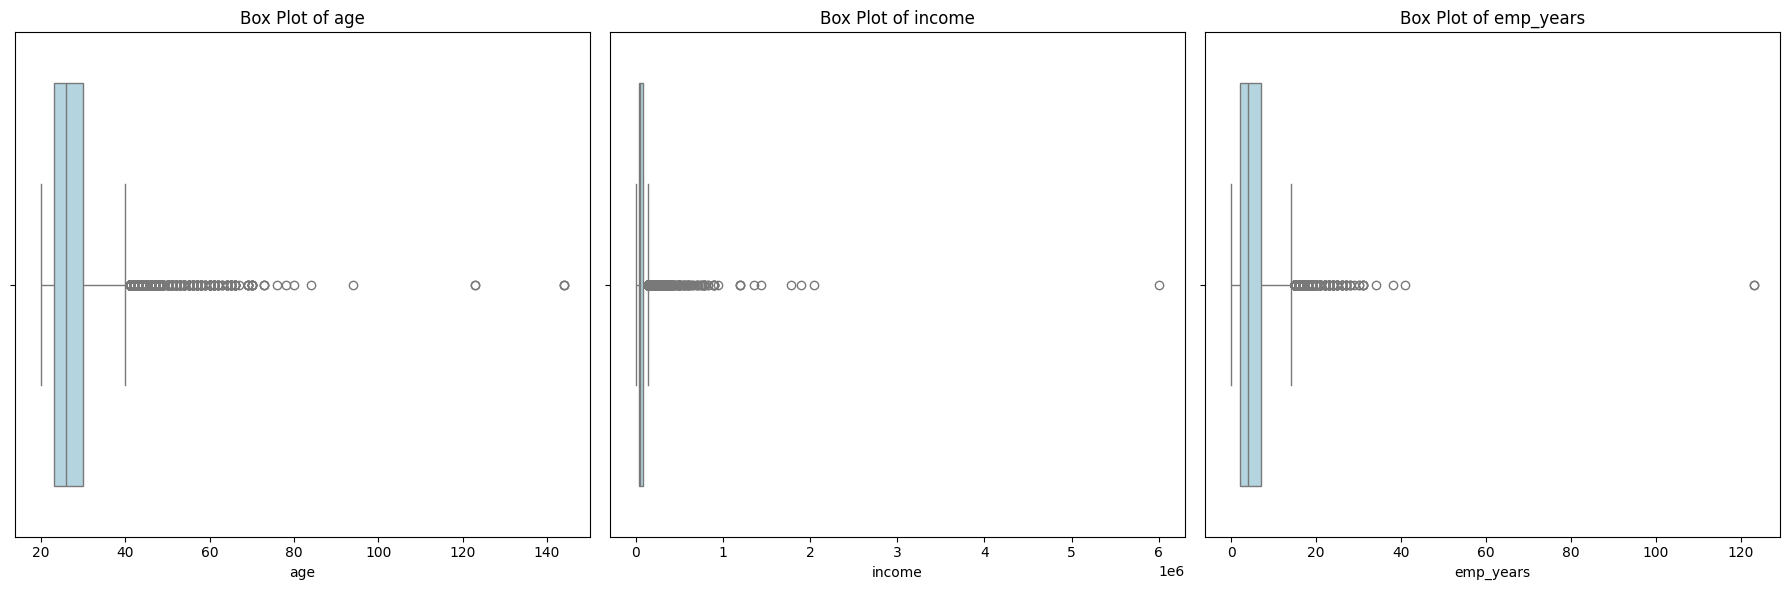

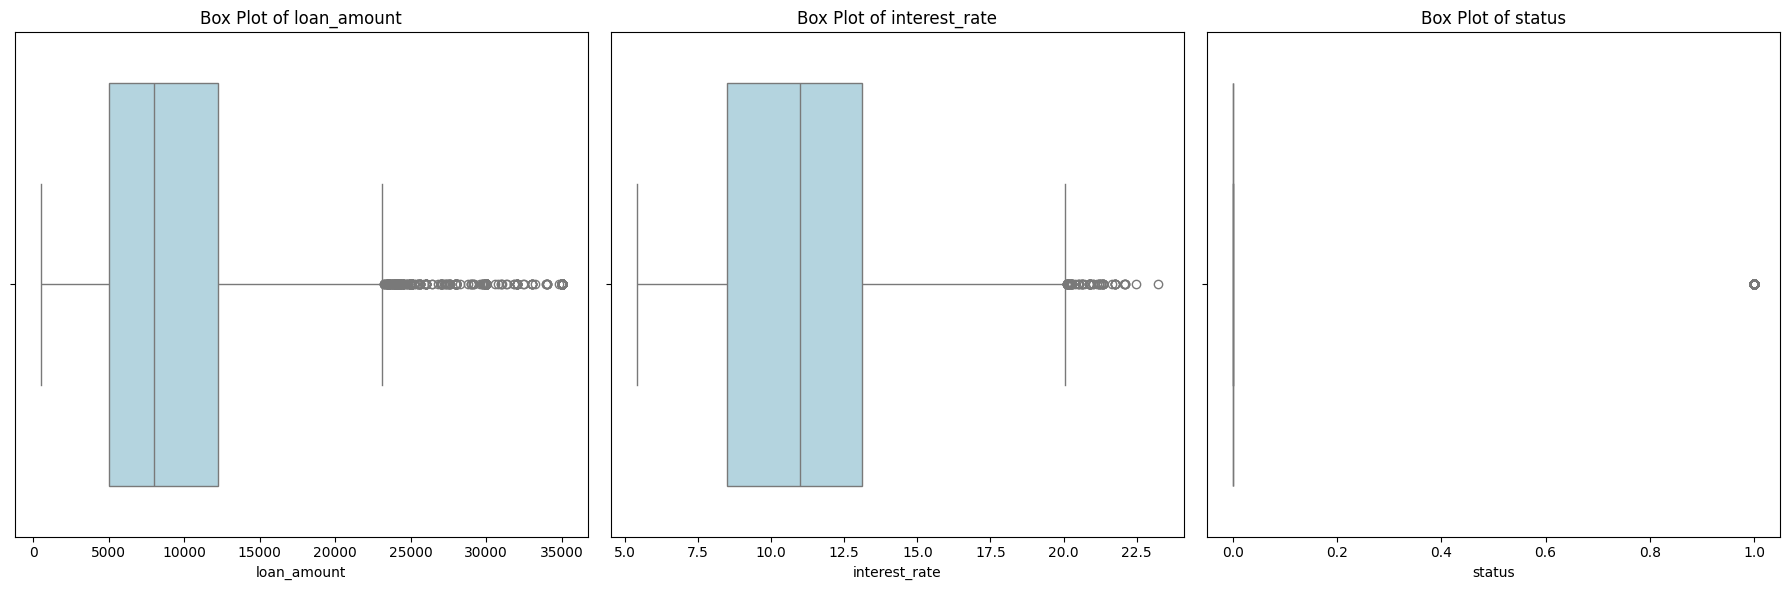

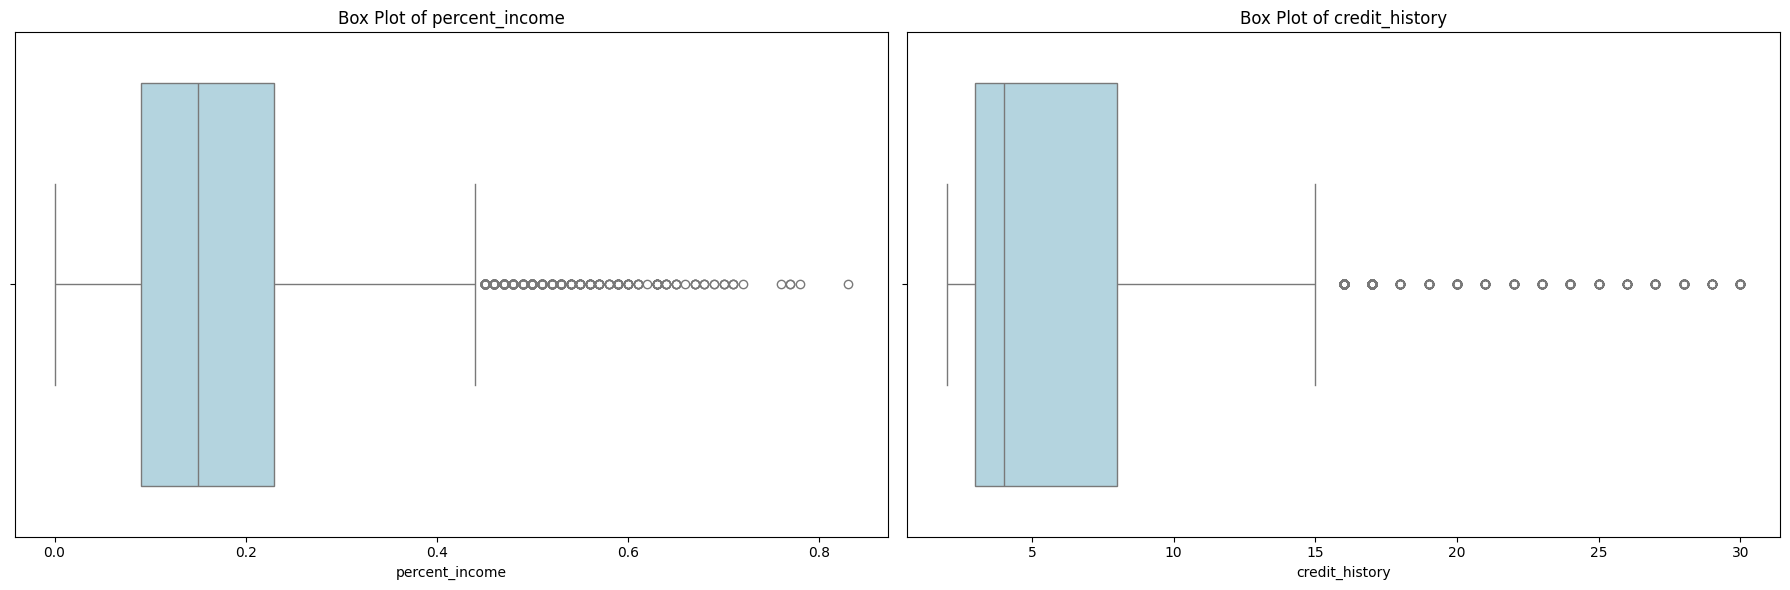

In [18]:
df = pd.read_csv('cleaned_updated_data.csv')

# Function to visualize box plots in 3 columns per row
def visualize_boxplots(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    n_cols = len(numerical_cols)
    
    for i in range(0, n_cols, 3):  # Loop through 3 columns at a time
        cols_to_plot = numerical_cols[i:i+3]
        
        # Create a row of subplots with up to 3 box plots per row
        fig, axs = plt.subplots(1, len(cols_to_plot), figsize=(18, 6))

        for j, col in enumerate(cols_to_plot):
            sns.boxplot(x=df[col], ax=axs[j], color='lightblue')
            axs[j].set_title(f'Box Plot of {col}')
        
        # Adjust layout for better visualization
        plt.tight_layout()
        plt.show()

visualize_boxplots(df)

### 7. Handling Outliers 

In [19]:
# Function to remove outliers using IQR method for multiple columns
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out the outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# List of columns with outliers you want to handle
columns_to_handle = ['age', 'income', 'emp_years', 'loan_amount', 'interest_rate', 'percent_income', 'credit_history'] 

df_cleaned = remove_outliers_iqr(df, columns_to_handle)

# Check the result
print(df_cleaned)


       age  income home_ownership  emp_years loan_purpose grade  loan_amount  \
1       21    9600            OWN        5.0    EDUCATION     B         1000   
5       21    9900            OWN        2.0      VENTURE     A         2500   
9       21   10000            OWN        6.0      VENTURE     D         1600   
19      24   10800       MORTGAGE        8.0    EDUCATION     B         1750   
23      24   10980            OWN        0.0     PERSONAL     A         1500   
...    ...     ...            ...        ...          ...   ...          ...   
32093   38   59475       MORTGAGE       10.0      MEDICAL     D        18125   
32095   38   67870       MORTGAGE        6.0      MEDICAL     B         5000   
32105   37   21600           RENT        4.0      MEDICAL     D         3800   
32120   38   12000            OWN        4.0    EDUCATION     A         4800   
32128   38  110000       MORTGAGE        5.0      MEDICAL     B        16000   

       interest_rate  status  percent_i

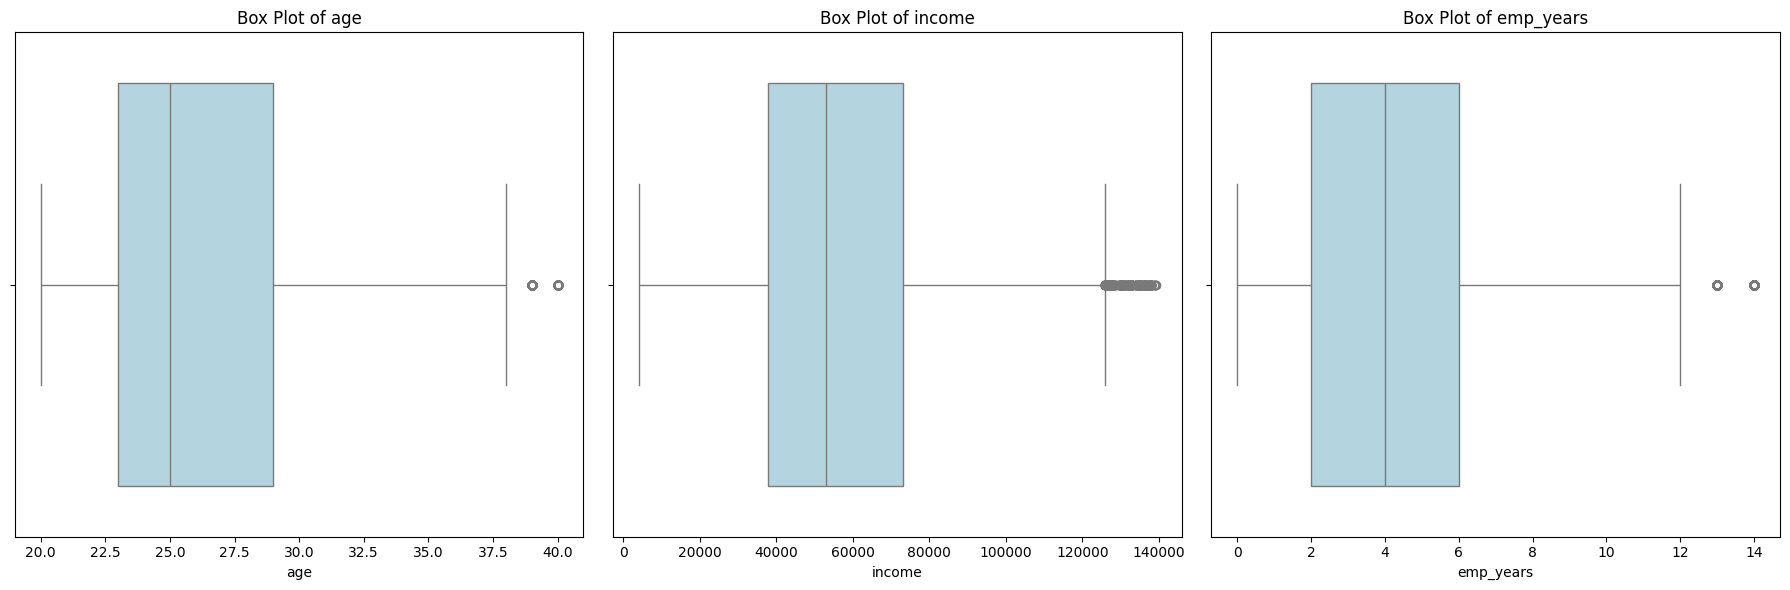

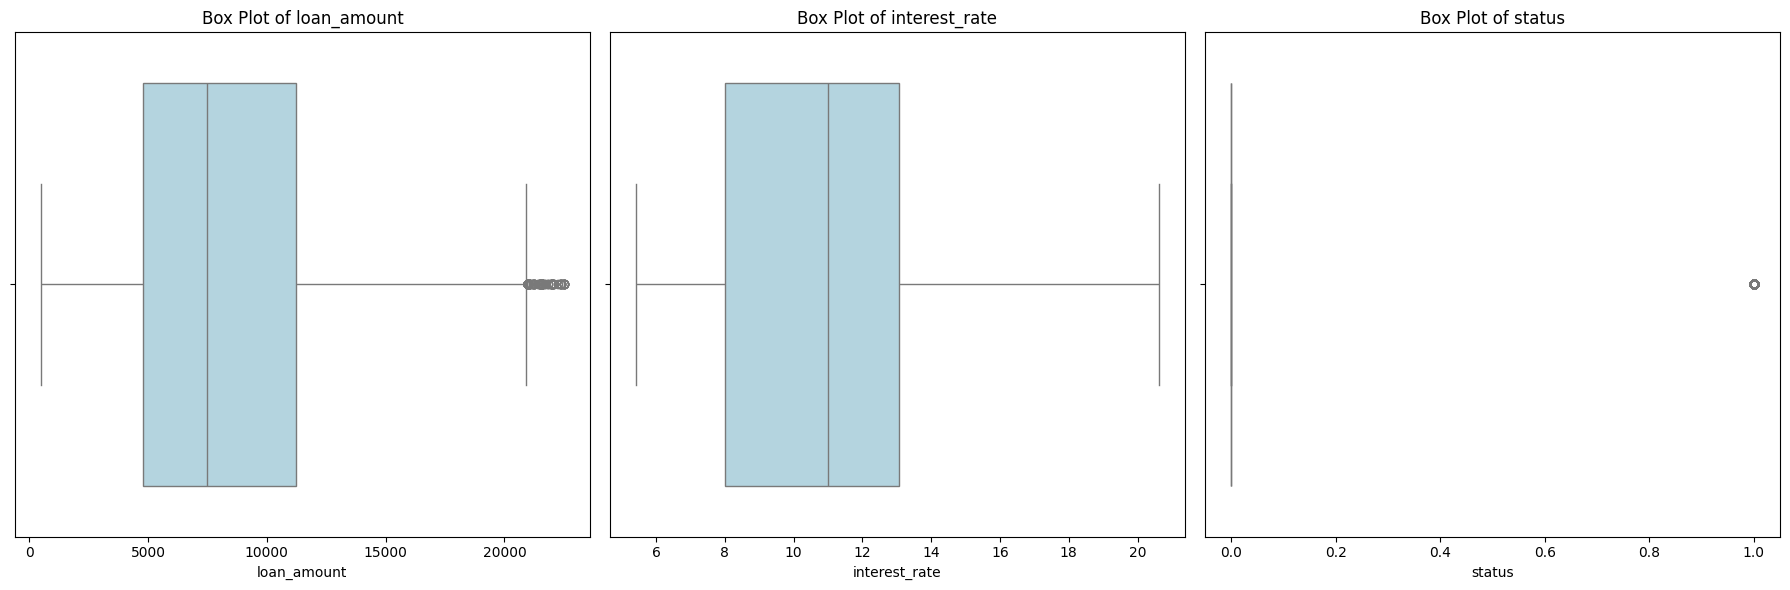

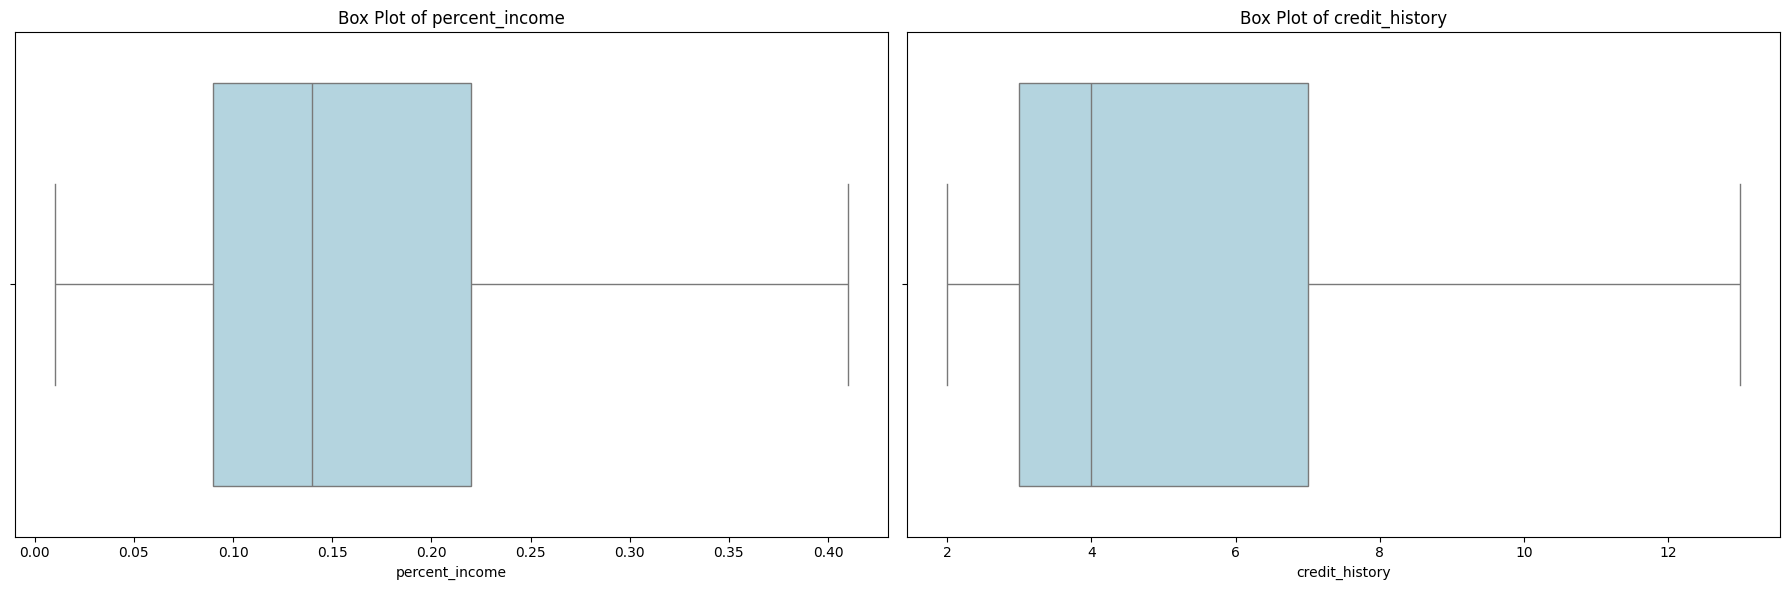

In [20]:
visualize_boxplots(df_cleaned)

In [21]:
df_cleaned.to_csv("Final Dataset.csv", index = False)
df = pd.read_csv("Final Dataset.csv")

### 8. Transform Categorical features

In [22]:
# Define the OneHotEncode
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid dummy variable trap

# Selecting columns to encode
categorical_columns = ['home_ownership', 'loan_purpose', 'default_history']

# Fit and transform the categorical columns
encoded_columns = onehot_encoder.fit_transform(df[categorical_columns])

# Convert the encoded columns into a DataFrame
encoded_df = pd.DataFrame(encoded_columns, columns=onehot_encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns and concatenate the new encoded columns
df_encoded = df.drop(columns=categorical_columns)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)


In [23]:
# Label Encoding for 'grade'
label_encoder = LabelEncoder()
df_encoded['grade'] = label_encoder.fit_transform(df['grade'])

In [24]:
# Check the final encoded DataFrame
print(df_encoded.head())
df_encoded.to_csv("final.csv", index = False)

   age  income  emp_years  grade  loan_amount  interest_rate  status  \
0   21    9600        5.0      1         1000          11.14       0   
1   21    9900        2.0      0         2500           7.14       1   
2   21   10000        6.0      3         1600          14.74       1   
3   24   10800        8.0      1         1750          10.99       1   
4   24   10980        0.0      0         1500           7.29       0   

   percent_income  credit_history  home_ownership_OTHER  home_ownership_OWN  \
0            0.10               2                   0.0                 1.0   
1            0.25               2                   0.0                 1.0   
2            0.16               3                   0.0                 1.0   
3            0.16               2                   0.0                 0.0   
4            0.14               3                   0.0                 1.0   

   home_ownership_RENT  loan_purpose_EDUCATION  loan_purpose_HOMEIMPROVEMENT  \
0           

In [25]:
df = pd.read_csv("final.csv")
df.head()

,age,income,emp_years,grade,loan_amount,interest_rate,status,percent_income,credit_history,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_purpose_EDUCATION,loan_purpose_HOMEIMPROVEMENT,loan_purpose_MEDICAL,loan_purpose_PERSONAL,loan_purpose_VENTURE,default_history_Y
0,21,9600,5.0,1,1000,11.14,0,0.10,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,21,9900,2.0,0,2500,7.14,1,0.25,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,21,10000,6.0,3,1600,14.74,1,0.16,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,24,10800,8.0,1,1750,10.99,1,0.16,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,24,10980,0.0,0,1500,7.29,0,0.14,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
df.tail()

,age,income,emp_years,grade,loan_amount,interest_rate,status,percent_income,credit_history,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_purpose_EDUCATION,loan_purpose_HOMEIMPROVEMENT,loan_purpose_MEDICAL,loan_purpose_PERSONAL,loan_purpose_VENTURE,default_history_Y
26001,38,59475,10.0,3,18125,14.84,1,0.26,13,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
26002,38,67870,6.0,1,5000,10.99,0,0.07,13,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26003,37,21600,4.0,3,3800,10.99,1,0.18,11,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
26004,38,12000,4.0,0,4800,7.29,1,0.40,12,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
26005,38,110000,5.0,1,16000,11.99,0,0.15,13,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Feature Engineering

### 1. Create new features

In [27]:
# Create the age-to-income and loan-to-income ratios
df['age_income_ratio'] = df['age'] / df['income']
df['loan_income_ratio'] = df['loan_amount'] / df['income']
df.to_csv("original_data.csv", index = False)

### 2. Feature scaling and normalization

In [28]:
# Define features and target variable
X = df[['age', 'income', 'emp_years', 'grade', 'loan_amount', 'interest_rate',
                 'percent_income', 'credit_history', 'home_ownership_OTHER',
                 'home_ownership_OWN', 'home_ownership_RENT', 'loan_purpose_EDUCATION',
                 'loan_purpose_HOMEIMPROVEMENT', 'loan_purpose_MEDICAL',
                 'loan_purpose_PERSONAL', 'loan_purpose_VENTURE', 'default_history_Y',
                 'age_income_ratio', 'loan_income_ratio']]
y = df['status']  # 'status' is target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()  # For Z-score normalization
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Check the scaled data
print(X_train_scaled.head())
print(X_test_scaled.head())


        age    income  emp_years     grade  loan_amount  interest_rate  \
0 -0.554242  2.862472  -0.401417 -0.158393    -0.693456       0.023893   
1 -1.056866 -1.041835  -0.100336  1.617040    -0.693456       1.418259   
2  0.451006 -0.169965  -1.304660 -0.158393    -0.278285      -0.342872   
3  0.451006 -0.056243   0.200745  0.729323    -0.683077       0.453437   
4 -0.302930  0.474460   1.405069 -1.046109    -0.901042      -1.320910   

   percent_income  credit_history  home_ownership_OTHER  home_ownership_OWN  \
0       -1.339781       -0.679314             -0.056841           -0.289621   
1        0.107769       -0.679314             -0.056841           -0.289621   
2       -0.337631        1.531126             -0.056841           -0.289621   
3       -0.783031        0.057499             -0.056841           -0.289621   
4       -1.117081       -1.047721             -0.056841           -0.289621   

   home_ownership_RENT  loan_purpose_EDUCATION  loan_purpose_HOMEIMPROVEMENT  \


### 3. Correlation Visualiztion

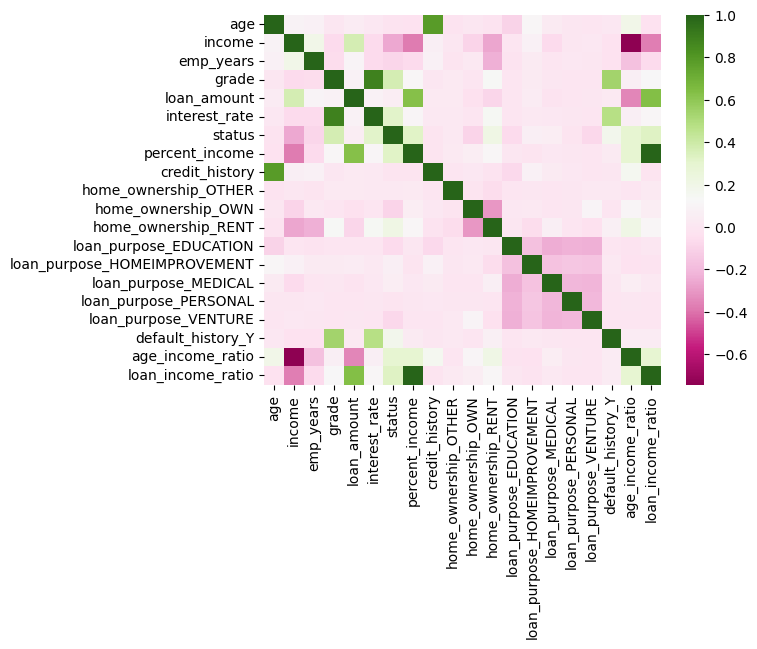

In [35]:
corr = df.corr()
sns.heatmap(corr, annot = False, cmap = "PiYG")
plt.show()

## Model Development, Training & Evaluation

In [46]:
# Initialize the models
svm_model = SVC(kernel='linear', random_state=42)
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
xgboost_model = xgb.XGBClassifier(random_state=42)

# Define a function to train and evaluate models
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    print(f"{model.__class__.__name__} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Train and evaluate each model
train_and_evaluate(svm_model, X_train_scaled, X_test_scaled, y_train, y_test)
train_and_evaluate(logistic_model, X_train_scaled, X_test_scaled, y_train, y_test)
train_and_evaluate(random_forest_model, X_train_scaled, X_test_scaled, y_train, y_test)
train_and_evaluate(xgboost_model, X_train_scaled, X_test_scaled, y_train, y_test)

#  Build and train a Neural Network
def build_neural_network(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))  # First hidden layer
    model.add(Dense(32, activation='relu'))  # Second hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#  Train and evaluate the Neural Network
nn_model = build_neural_network(X_train_scaled.shape[1])
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

# Evaluate the Neural Network
nn_y_pred = (nn_model.predict(X_test_scaled) > 0.5).astype("int32")  # Convert probabilities to binary
print("Neural Network Results:")
print("Accuracy:", accuracy_score(y_test, nn_y_pred))
print(classification_report(y_test, nn_y_pred))

SVC Results:
Accuracy: 0.8604382929642446
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4173
           1       0.73      0.47      0.57      1029

    accuracy                           0.86      5202
   macro avg       0.80      0.71      0.74      5202
weighted avg       0.85      0.86      0.85      5202

LogisticRegression Results:
Accuracy: 0.858323721645521
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4173
           1       0.70      0.50      0.58      1029

    accuracy                           0.86      5202
   macro avg       0.79      0.72      0.75      5202
weighted avg       0.85      0.86      0.85      5202

RandomForestClassifier Results:
Accuracy: 0.9300269127258747
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4173
           1       0.95      0.68      0.79      1029

    accuracy           

C:\Users\yapat\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network Results:
Accuracy: 0.9184928873510189
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4173
           1       0.91      0.66      0.76      1029

    accuracy                           0.92      5202
   macro avg       0.91      0.82      0.86      5202
weighted avg       0.92      0.92      0.91      5202



## Model Selection and Saving

In [52]:
# the best model (Random Forest)
best_model = random_forest_model  # this is the best based on evaluation

# Save the selected model
model_credit_score = 'best_model_random_forest.pkl'
joblib.dump(best_model, model_credit_score)

print(f"Model saved to {model_credit_score}")

#Save the scaler
scaler_credit_score = 'scaler.pkl'
joblib.dump(scaler, scaler_credit_score)

print(f"Scaler saved to {scaler_credit_score}")

Model saved to best_model_random_forest.pkl
Scaler saved to scaler.pkl


## Function to take input from user

In [60]:
# Load the saved model and saved scaler
loaded_model = joblib.load(model_credit_score)
loaded_scaler = joblib.load(scaler_credit_score)

# Function to predict loan status
def predict_status(user_input):
    # Convert user input to a DataFrame
    input_df = pd.DataFrame([user_input])
    
    # Scale the input features using the loaded scaler
    input_scaled = loaded_scaler.transform(input_df)  # Use the loaded scaler

    # Predict the status
    prediction = loaded_model.predict(input_scaled)
    
    return prediction[0]  # Return the predicted status

# Example of user input
user_input = {
    'age': 21,
    'income': 9900,
    'emp_years': 2,
    'grade': 0,  # Make sure this is correctly encoded (B = 1 if using label encoding)
    'loan_amount': 2500,
    'interest_rate': 7.14,
    'percent_income': 0.25,
    'credit_history': 2,
    'home_ownership_OTHER': 0,
    'home_ownership_OWN': 1,
    'home_ownership_RENT': 0,
    'loan_purpose_EDUCATION': 0,
    'loan_purpose_HOMEIMPROVEMENT': 0,
    'loan_purpose_MEDICAL': 0,
    'loan_purpose_PERSONAL': 0,
    'loan_purpose_VENTURE': 1,
    'default_history_Y': 0,
    'age_income_ratio': 0.00212121,  # Calculated as age/income
    'loan_income_ratio': 0.252525  # Calculated as loan_amount/income
}

# Call the prediction function
predicted_status = predict_status(user_input)
print("Predicted Status:", predicted_status)

if predicted_status == 0:
    print("You are creditworthy : ", "Score > = 650")
else:
    print("You are not creditworthy : ", "Score < 650")

Predicted Status: 1
You are not creditworthy :  Score < 650


C:\Users\yapat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
